# Assignment Activity 1: Making predictions with regression

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Question 2: Import the Python Libraries and Load Data

In [2]:
# Load the data 

# Specifying the path to the CSV file
file_path ='/Users/orkestro/Downloads/LSE_DA301_assignment_files/turtle_reviews.csv'

In [3]:
# Reading the CSV file into a DataFrame named 'reviews'
try:
    reviews = pd.read_csv(file_path)
    print("Data loaded successfully!\n")
    print("First few rows of the data:")
    print(reviews.head())
except FileNotFoundError:
    print("File not found! Please check the file path and try again.")

Data loaded successfully!

First few rows of the data:
   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Am

In [4]:
# Basic data exploration 

print(reviews.head())

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

In [5]:
print(reviews.shape)

(2000, 11)


## Question 3: Sense-check the DataFrame

In [6]:
# Print the dataframe 

print(reviews.head())

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

In [7]:
# Data types and metadata

print(reviews.dtypes)

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


In [8]:
# Check additional metadata 

print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


In [9]:
# Check for missing values

print(reviews.isnull().sum())

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [10]:
# Descriptive statistics 

print(reviews.describe())

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


## Question 3: Remove Redundant Columns 

In [11]:
# Drop redundant columns

reviews_cleaned = reviews.drop(columns=['language', 'platform'])

## Question 4: Change Column Headings

In [12]:
# Rename columns for easier reference

reviews_cleaned.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'}, inplace=True)

In [13]:
# Confirm changes

print("Column names after renaming:")
print(reviews_cleaned.columns.tolist())

Column names after renaming:
['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product', 'review', 'summary']


## Question 5: Save Clean DataFrame

In [14]:
# Save cleaned data

reviews_cleaned.to_csv('reviews_cleaned.csv', index=False)

## Question 6: Import and Sense-Check Cleaned Data

In [15]:
# Reimport saved cleaned data
reviews_reloaded = pd.read_csv('reviews_cleaned.csv')

In [16]:
# Check reloaded data
print("\nReloaded data column names:")
print(reviews_reloaded.columns.tolist())


Reloaded data column names:
['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product', 'review', 'summary']


## Question 7: Linear Regression Analysis

In [17]:
import statsmodels.api as sm

# Ensure that 'reviews_cleaned' DataFrame contains the relevant data
X = reviews_cleaned[['age', 'remuneration', 'spending_score']]
Y = reviews_cleaned['loyalty_points']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

In [18]:
# Extract estimated parameers and generate regression table

# Getting the estimated parameters
params = model.params
print("Parameters: ", params)

# Getting standard errors
std_err = model.bse
print("\nStandard Errors: ", std_err)

# Getting predicted values
predictions = model.predict(X)

# Display the regression table
print("\nSummary: ", model.summary())

Parameters:  const            -2203.059751
age                 11.060659
remuneration        34.008385
spending_score      34.183197
dtype: float64

Standard Errors:  const             52.360900
age                0.868845
remuneration       0.497000
spending_score     0.451931
dtype: float64

Summary:                              OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:20:44   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                          

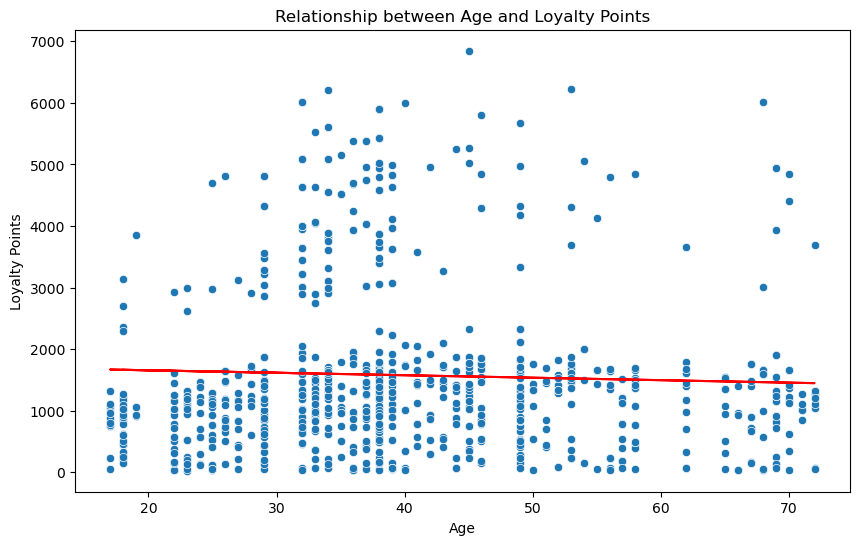

In [19]:
# Plotting the regression line

import matplotlib.pyplot as plt
import seaborn as sns

# Visualising relationship between 'age' and 'loyalty_points'
plt.figure(figsize=(10,6))
sns.scatterplot(x=reviews_cleaned['age'], y=reviews_cleaned['loyalty_points'])

# Getting predictions when considering 'age' as the only independent variable
single_var_model = sm.OLS(Y, sm.add_constant(reviews_cleaned['age'])).fit()
plt.plot(reviews_cleaned['age'], single_var_model.predict(sm.add_constant(reviews_cleaned['age'])), color='red')

plt.title('Relationship between Age and Loyalty Points')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.show()

# Assignment Activity 2: Making predictions with clustering

In [20]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [21]:
# Load the previously cleaned CSV file 
file_path = 'reviews_cleaned.csv'

In [22]:
df = pd.read_csv(file_path)

In [23]:
# Creating a new DataFrame with 'remuneration' and 'spending_score'
df2 = df[['remuneration', 'spending_score']]

In [25]:
# Basic exploration of the new DataFrame
print(df2.head())  # Displaying first few rows of df2
print("\nDataFrame Shape: ", df2.shape)  # Displaying the shape of df2
print("\nDataFrame Descriptive Statistics:\n", df2.describe())  # Descriptive stats of df2
print("\nMissing Values Check:\n", df2.isnull().sum())  # Checking for missing values in df2

   remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

DataFrame Shape:  (2000, 2)

DataFrame Descriptive Statistics:
        remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

Missing Values Check:
 remuneration      0
spending_score    0
dtype: int64


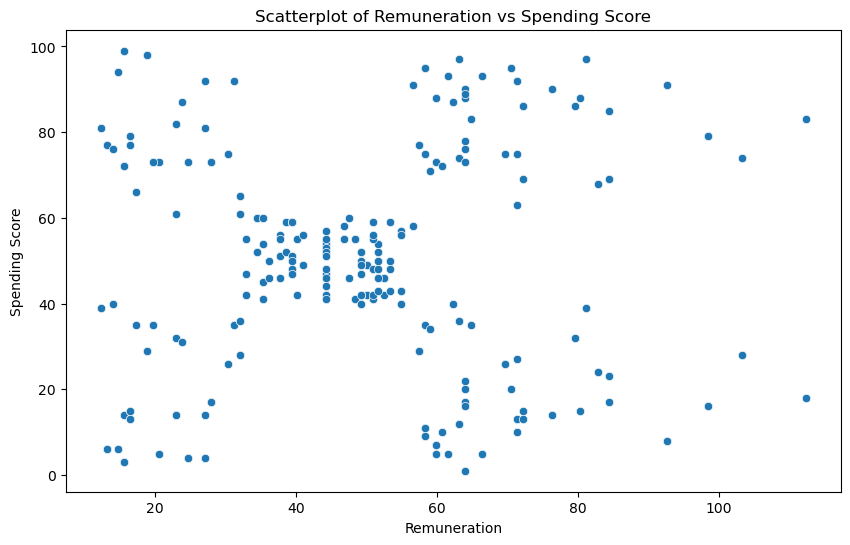

In [26]:
# Data visualisation
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2, x='remuneration', y='spending_score')
plt.title('Scatterplot of Remuneration vs Spending Score')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.show()

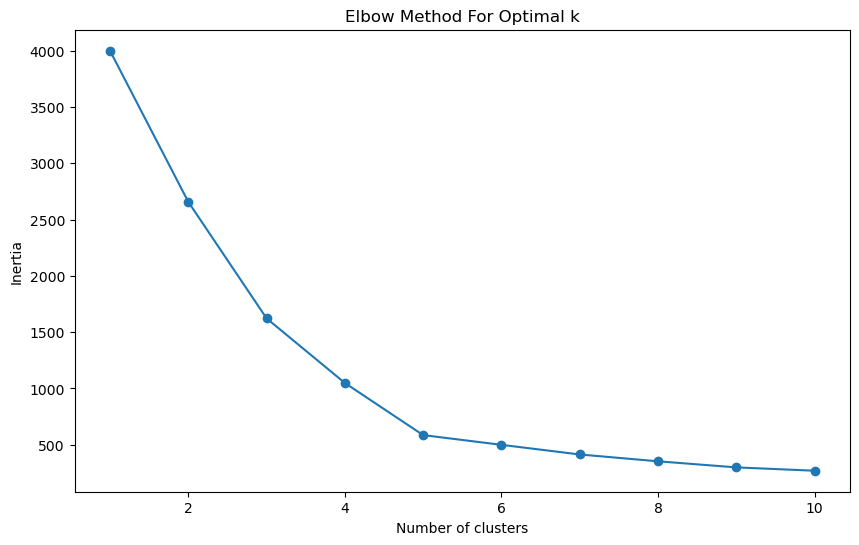

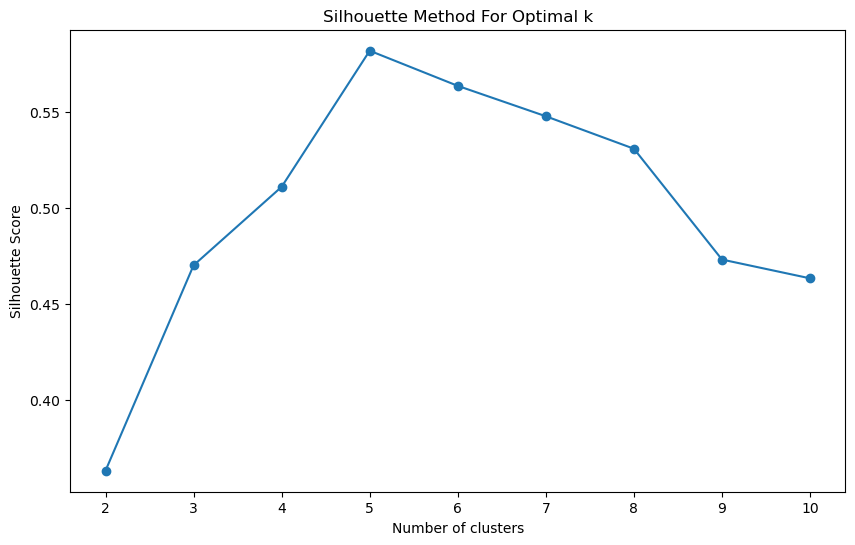

In [34]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Standardising the data
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

# Elbow Method
inertia_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df2_scaled)
    inertia_list.append(kmeans.inertia_)

# Plotting Elbow Method
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia_list, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Method
silhouette_list = []
for k in range(2, 11):  # Starts with 2 because silhouette_score cannot compute with k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df2_scaled)
    silhouette = silhouette_score(df2_scaled, kmeans.labels_)
    silhouette_list.append(silhouette)

# Plotting Silhouette Method
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.title('Silhouette Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ensure your df2 DataFrame is defined before this point.

# Standardising the data
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

# Elbow Method
inertia_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df2_scaled)
    inertia_list.append(kmeans.inertia_)

# Silhouette Method
silhouette_list = [None]  # Silhouette cannot compute with k=1, hence assigning None
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df2_scaled)
    silhouette = silhouette_score(df2_scaled, kmeans.labels_)
    silhouette_list.append(silhouette)

# Creating DataFrame
result_df = pd.DataFrame({
    'Num_Clusters': range(1, 11),
    'Inertia': inertia_list,
    'Silhouette_Score': silhouette_list
})

# Display the DataFrame as a Table
print(result_df)

   Num_Clusters      Inertia  Silhouette_Score
0             1  4000.000000               NaN
1             2  2657.345921          0.363000
2             3  1622.668783          0.470082
3             4  1048.678104          0.510998
4             5   585.566140          0.581955
5             6   499.154921          0.563634
6             7   413.493359          0.547788
7             8   352.814706          0.530861
8             9   298.796433          0.473085
9            10   269.153859          0.463293


## Evaluating Values of k for K-Means Clustering


- k=3

  Inertia: 1622.67
  Silhouette Score: 0.47
  Analysis: A lower inertia compared to k=2 and a reasonably good silhouette score indicates well-defined clusters.

- k=4

  Inertia: 1048.68
  Silhouette Score: 0.51
  Analysis: Although it has higher inertia than k=5, the silhouette score is still commendable. Potentially providing a good balance between not over-segmenting the market and still maintaining clear cluster definition.

- k=5

  Inertia: 585.57
  Silhouette Score: 0.58
  Analysis: Shows the highest silhouette score among the options, indicating well-separated clusters. However, it's worth considering whether the higher number of clusters would provide actionable insights in a marketing context.


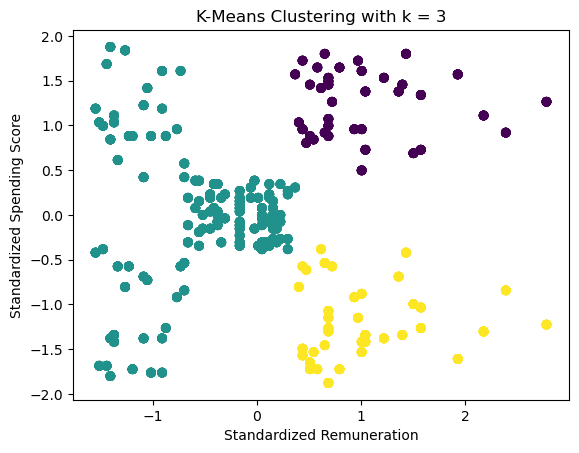

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df2_scaled)
labels = kmeans.labels_

plt.scatter(df2_scaled[:, 0], df2_scaled[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering with k = 3')
plt.xlabel('Standardised Remuneration')
plt.ylabel('Standardised Spending Score')
plt.show()b

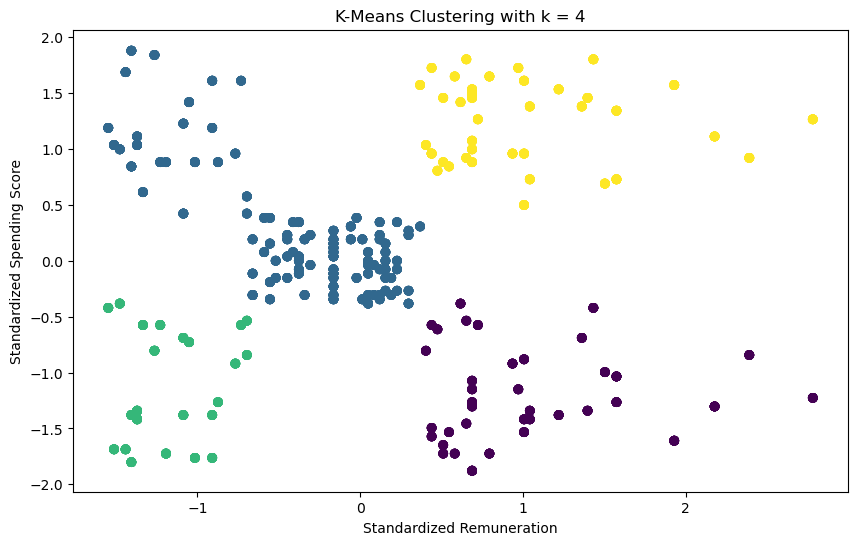

In [40]:
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_4.fit(df2_scaled)
labels_4 = kmeans_4.labels_

plt.figure(figsize=[10,6])
plt.scatter(df2_scaled[:, 0], df2_scaled[:, 1], c=labels_4, cmap='viridis')
plt.title('K-Means Clustering with k = 4')
plt.xlabel('Standardised Remuneration')
plt.ylabel('Standardised Spending Score')
plt.show()

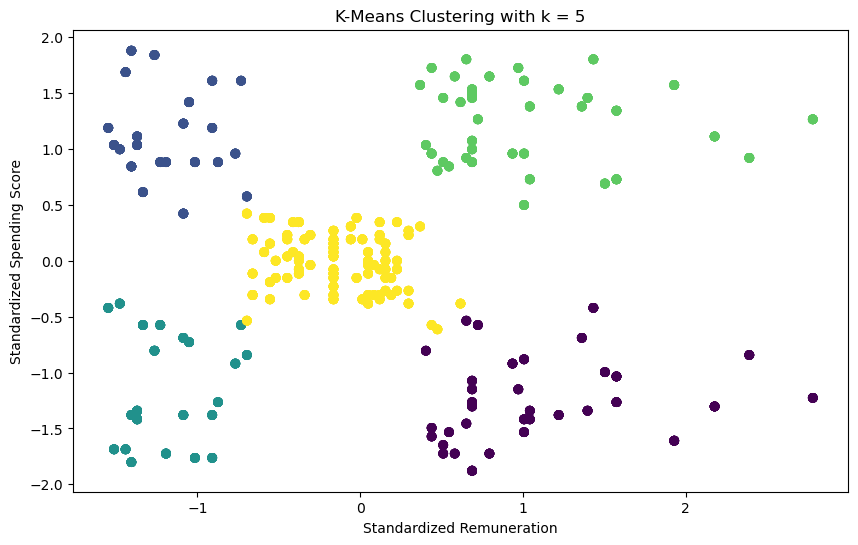

In [41]:
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_5.fit(df2_scaled)
labels_5 = kmeans_5.labels_

plt.figure(figsize=[10,6])
plt.scatter(df2_scaled[:, 0], df2_scaled[:, 1], c=labels_5, cmap='viridis')
plt.title('K-Means Clustering with k = 5')
plt.xlabel('Standardised Remuneration')
plt.ylabel('Standardised Spending Score')
plt.show()

## Analysis on Optimal Cluster Number Selection for Turtle Games' Customer Segmentation

#### k=3
Adopting a k=3 approach provides a succinct and clear-cut segmentation likely encompassing broad customer classifications, potentially aligning with generalised spending categories such as "low", "medium", and "high" spenders. From a strategic standpoint, this choice streamlines our segmentation approach, facilitating larger scale campaigns with overarching messages suitable for wide-reaching, albeit generalised, market strategies. Herein lies its strength in simplicity and broad applicability, making it a strong option if Turtle Games prioritises wide-scope campaigns without delving into niche marketing efforts.

#### k=4
On the other hand, opting for k=4 offers an additional layer of granularity in our segmentation, possibly unearthing a pivotal subcategory that may be obfuscated with a k=3 model. This model may serve to identify and extract nuanced behavioural patterns within our customer base (e.g., distinguishing premium users, sporadic shoppers, or bargain hunters). Thus, if a distinct, strategically-actionable subgroup emerges with this segmentation, k=4 might represent a strategic gold mine, allowing for a slightly more nuanced approach without veering into overly complex marketing stratagems.

#### k=5 
Choosing k=5 ushers in a more granular, detailed marketing framework, prudently considered if each of the five segments demonstrates distinct, actionable behaviors warranting individualised strategic approaches. The utility of this option, however, hinges on a keen understanding of each cluster's unique attributes and ensuring that each differentiated strategy can be resourcefully and effectively implemented. This selection is congruent with a more personalized, customer-centric marketing approach and, if resourcefully harnessed, could procure the highest return on investment among the considered k values.

### Conclusive Analysis:
Simplicity Versus Detail:
Choosing a lower k (3 or 4) embodies a strategy leaning towards clear, overarching marketing initiatives, potentially enhancing resource allocation efficiency and maintaining strategic simplicity, especially in broader customer archetypes.

#### Detailed Nuance Versus Resource Implications:
Conversely, a higher k (5) pivots towards a more micro-targeted, individualized approach, warranting consideration of whether the resource investment aligns with the depth of stratagem and potential ROI offered by the additional customer insights.

#### Rooted in Actionable Insights:
Choosing k must balance analytical recommendations, like the silhouette score, with the practical usability of the identified clusters. Turning analytical findings into tangible strategies is crucial.


### Final Reflection:
Choosing a k requires validating the practicality and strategic use of the formed clusters, ensuring they align with resource-appropriate, actionable strategies. Combining analytical skill with strategic insight is vital to align and drive Turtle Games’ objectives and customer engagement efforts forward.

## Fitting the final model with k=4

In [42]:
from sklearn.cluster import KMeans

# Setting k to 4
chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
kmeans.fit(df2_scaled)

# Checking number of observations per cluster
import pandas as pd
labels = pd.Series(kmeans.labels_)
print(labels.value_counts())

1    1013
3     356
0     351
2     280
dtype: int64


## Justification for Choosing k=4

Opting for `k=4` allows for a detailed segmentation of the customer base, likely uncovering an additional customer group that a 3-cluster solution might overlook. This extra granularity can empower more targeted marketing initiatives, given that the additional cluster offers significant, actionable insights without overly complicating strategic planning.

## Observations per Cluster

To assess the suitability of the chosen number of clusters, you can utilise `labels.value_counts()` to retrieve the count of observations per cluster. Evaluate both the raw and relative sizes to ensure each cluster is of a practical size for distinct marketing initiatives.

## Visualization of Clusters

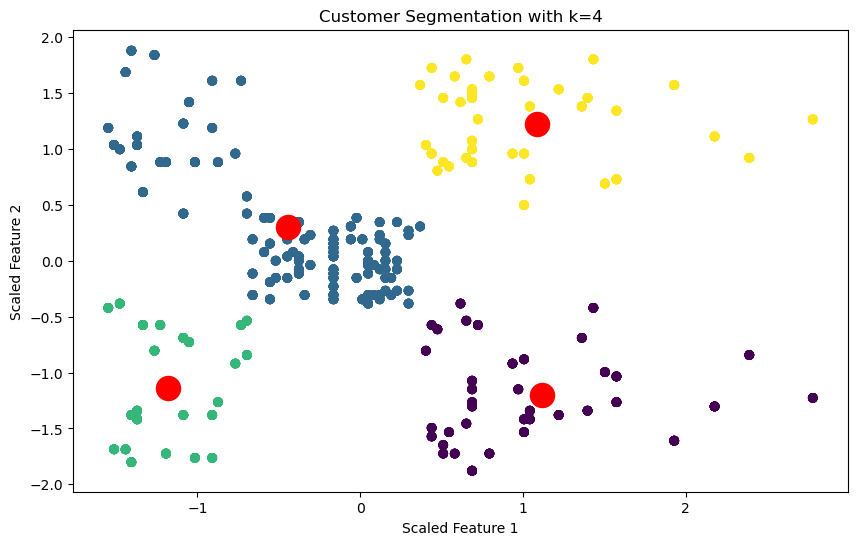

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df2_scaled[:, 0], df2_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.title("Customer Segmentation with k=4")
plt.show()


The visual representation elucidates cluster formations and centroids (red dots), aiding in interpreting the distinctions between clusters.

Analysing the mean values of the features within each cluster can reveal defining characteristics that inform distinct marketing strategies. Align these insights with tailored strategies that address the unique behaviors or needs of each segment to bolster Turtle Games' customer engagement and sales. Ensure that these data-driven insights are translated into feasible, impactful strategies for data-informed decision-making.


## Compute mean values within clusters

In [46]:
import pandas as pd

df2_copy = df2.copy()

# Add cluster labels to the dataframe copy
df2_copy['Cluster'] = kmeans.labels_

# Calculate the mean values per cluster
cluster_means = df2_copy.groupby('Cluster').mean()
print(cluster_means)

         remuneration  spending_score
Cluster                              
0           73.935499       18.555556
1           37.818756       57.859822
2           20.795786       20.285714
3           73.240281       82.008427


## Cluster Interpretation and Strategies:

**Cluster 0 - High Remuneration, Low Spending:**

- **Possible Persona:** Wealthy, cautious spenders possibly focused on specific product types or categories.
- **Strategy:** Implement targeted marketing focusing on high-quality, popular, or exclusive items within their preferred categories, possibly identified via past purchase patterns. Introduce incentive programs to elevate spending.

**Cluster 1 - Medium Remuneration, Medium-High Spending:**

- **Possible Persona:** Enthusiasts or collectors who, despite having a moderate income, prioritise spending on gaming and related products.
- **Strategy:** Curate bundles of products that offer value and perhaps exclusivity. Develop reward programs that acknowledge and incentivise their engagement and spending.

**Cluster 2 - Low Remuneration, Low Spending:**

- **Possible Persona:** Budget-conscious customers, potentially young gamers, or parents buying for children, prioritising affordability.
- **Strategy:** Promote budget-friendly options, sales, and deals. Develop loyalty programs that reward consistent, albeit lower, spending and engage through community events or activities.

**Cluster 3 - High Remuneration, High Spending:**

- **Possible Persona:** Affluent customers with a keen interest in varied gaming and related products, potentially less sensitive to price.
- **Strategy:** Showcase premium and exclusive editions, offer early access to new releases, and possibly create an elite membership for exclusive offers and events.

## Considering Turtle Games Objectives:

**Loyalty Points Accumulation:**

- Evaluate how customers in each cluster accumulate loyalty points. Do higher spenders accumulate them faster, or are there particular purchase patterns that accelerate point accumulation?
- Investigate whether loyalty point accumulation correlates with repeat purchases or higher spending and if this varies across clusters.

**Utilising Social Data:**

- Identify if specific clusters are more vocal or influential in social data, such as reviews.
- Utilise feedback and reviews to inform product development and marketing strategies, ensuring they resonate with cluster-specific preferences and pain points.

**Product Impact:**

- Assess which products or product categories are favored by each cluster and their impact on overall and cluster-specific sales.
- Develop promotions and new products that align with the preferences of each cluster, ensuring alignment with Turtle Games' existing product portfolio and manufacturing capabilities.

**Data Reliability:**

- Ensure the validity of the clustering by verifying the data’s distribution and reliability.
- Explore if the clustering is consistent across different geographical sales regions (e.g., North America and Europe).

**Final Note:**

Continuously revisit and refine these strategies, ensuring they are effectively driving engagement and sales within each customer segment and are harmoniously integrated with Turtle Games' overall business strategy and objectives. Ensure that ethical considerations, especially in the context of responsible marketing and customer data usage, are upheld throughout the strategising and implementation process.

# Assignment Activity 3: Analysing customer sentiments with reviews

In [48]:
# Import necessary libraries

In [49]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/orkestro/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [53]:
# Data importing and preliminary checks

# Load the previously cleaned CSV file 
file_path = 'reviews_cleaned.csv'  

In [55]:
df = pd.read_csv('reviews_cleaned.csv')

In [56]:
print(df.head())  
print(df.info()) 

   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  

In [57]:
# Dropping all columns except 'review' and 'summary'
columns_to_keep = ['review', 'summary']
df = df[columns_to_keep]

In [59]:
# Convert text to lower case and remove punctuation
df = df.applymap(lambda x: x.lower())  
df = df.applymap(lambda x: re.sub(r'[^\w\s]', '', x))

In [60]:
# Drop duplicates
df = df.drop_duplicates()

In [61]:
# Tokenisation and finding common words
vec = CountVectorizer().fit(df['review'])
bag_of_words = vec.transform(df['review'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)


stop = set(stopwords.words('english'))
words_freq = [word for word in words_freq if word[0] not in stop]

# Display 15 most common words
print(words_freq[:15])

[('game', 1671), ('great', 580), ('fun', 552), ('one', 530), ('play', 502), ('like', 414), ('love', 323), ('really', 319), ('get', 319), ('cards', 301), ('tiles', 297), ('time', 291), ('good', 289), ('would', 280), ('book', 273)]


In [65]:
# Sentiment analysis to find positive and negative reviews

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialising the model
sia = SentimentIntensityAnalyzer()

# Getting sentiment scores
df['sentiment_scores'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Sorting and getting top and bottom reviews
top_positive = df.nlargest(20, 'sentiment_scores')
top_negative = df.nsmallest(20, 'sentiment_scores')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/orkestro/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [69]:
# Import additional library

!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.8/159.8 kB 2.7 MB/s eta 0:00:00a 0:00:01


In [70]:
# Copy DataFrame

df_copy = df.copy()

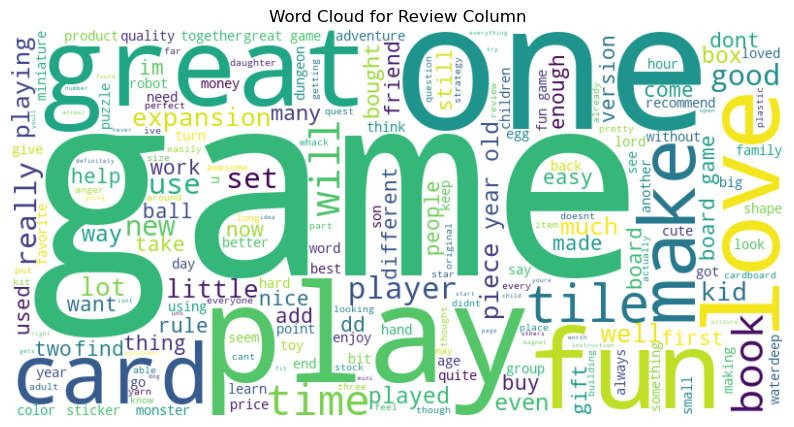

In [72]:
# Generating word cloud for 'review' column
review_text = ' '.join(df_copy['review'].tolist())
review_wordcloud = WordCloud(background_color='white', width=800, height=400).generate(review_text)

# Plotting the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(review_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Column')
plt.show()

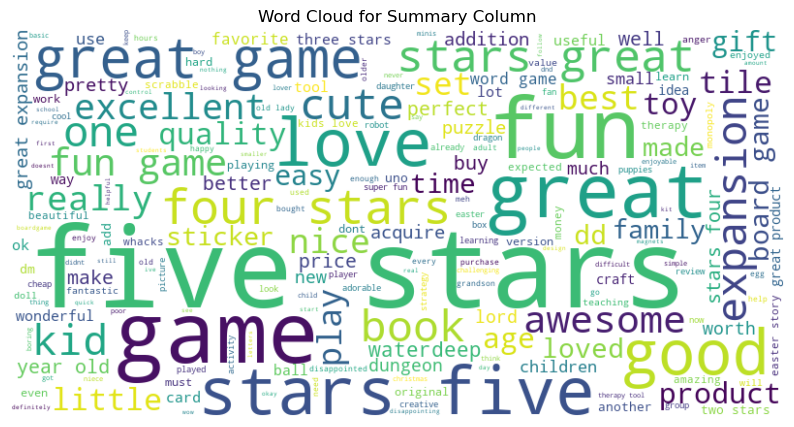

In [73]:
# Generating Word Cloud for 'summary' column
summary_text = ' '.join(df_copy['summary'].tolist())
summary_wordcloud = WordCloud(background_color='white', width=800, height=400).generate(summary_text)

# Plotting the Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(summary_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Summary Column')
plt.show()

In [74]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# If not downloaded yet, do it
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Join all reviews into a single string
all_reviews = ' '.join(review for review in df['review'])

# Remove alphanumeric characters
all_reviews = re.sub(r'\W', ' ', all_reviews)

# Tokenize and remove stopwords
all_words = [word for word in all_reviews.lower().split() if word not in stop_words]

# Get frequency distribution
word_frequency = Counter(all_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/orkestro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


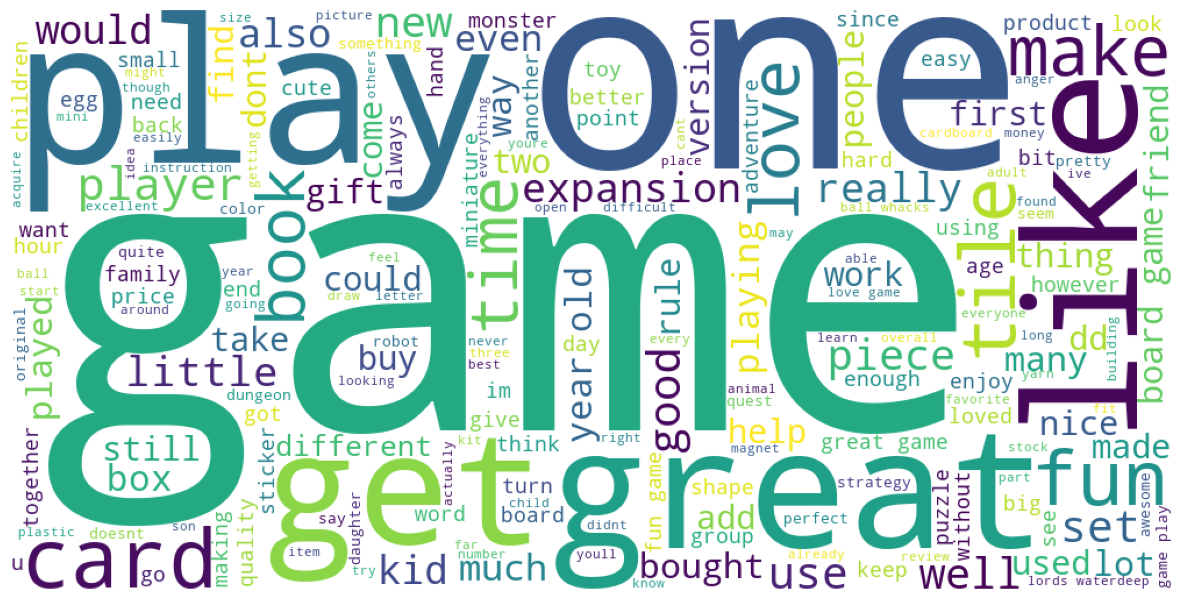

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create and visualize a word cloud
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stop_words, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [77]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# If not downloaded yet, do it
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Get 15 most common words
common_words = word_frequency.most_common(15)

# Calculate sentiment polarity of the 15 most common words
for word, freq in common_words:
    print(f"Word: {word}, Frequency: {freq}, Sentiment: {sia.polarity_scores(word)['compound']}")

Word: game, Frequency: 1671, Sentiment: 0.0
Word: great, Frequency: 580, Sentiment: 0.6249
Word: fun, Frequency: 552, Sentiment: 0.5106
Word: one, Frequency: 530, Sentiment: 0.0
Word: play, Frequency: 502, Sentiment: 0.34
Word: like, Frequency: 414, Sentiment: 0.3612
Word: love, Frequency: 323, Sentiment: 0.6369
Word: really, Frequency: 319, Sentiment: 0.0
Word: get, Frequency: 319, Sentiment: 0.0
Word: cards, Frequency: 301, Sentiment: 0.0
Word: tiles, Frequency: 297, Sentiment: 0.0
Word: time, Frequency: 291, Sentiment: 0.0
Word: good, Frequency: 289, Sentiment: 0.4404
Word: would, Frequency: 280, Sentiment: 0.0
Word: book, Frequency: 273, Sentiment: 0.0


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/orkestro/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [78]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

def get_word_frequencies(text, stopwords=set()):
    words = [word for word in text.split() if word not in stopwords]
    return Counter(words)

def generate_wordcloud(text, stopwords=set()):
    wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

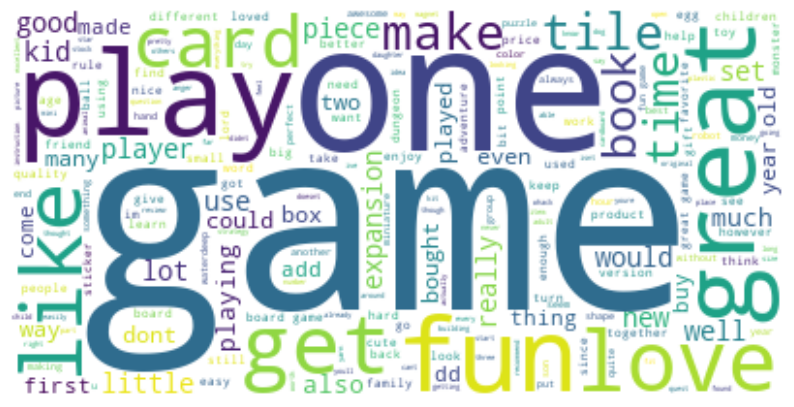

In [79]:
df['review_clean'] = df['review'].apply(clean_text)

all_reviews = ' '.join(df['review_clean'].tolist())
word_frequencies = get_word_frequencies(all_reviews, stop_words)

generate_wordcloud(all_reviews, stop_words)

In [81]:
def categorize_sentiment(score):
    """
    Categorizes sentiment based on VADER compound score.
    - Positive: score > 0.05
    - Negative: score < -0.05
    - Neutral: -0.05 <= score <= 0.05
    """
    compound_score = score['compound']
    
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [82]:
print(df.head())

                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9\n\nyour unpainted...   
2  nice art nice printing  why two panels are fil...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                    sentiment_scores  compound  \
0  {'neg': 0.108, 'neu': 0.833, 'pos': 0.059, 'co...   -0.6333   
1  {'neg': 0.101, 'neu': 0.695, 'pos': 0.205, 'co...    0.9404   
2  {'neg': 0.136, 'neu': 0.711, 'pos': 0.153, 'co...   -0.0045   
3  {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compou...    0.8860

## Review the sentiment polarity 

In [83]:
# Install necessary libraries

!pip install matplotlib seaborn

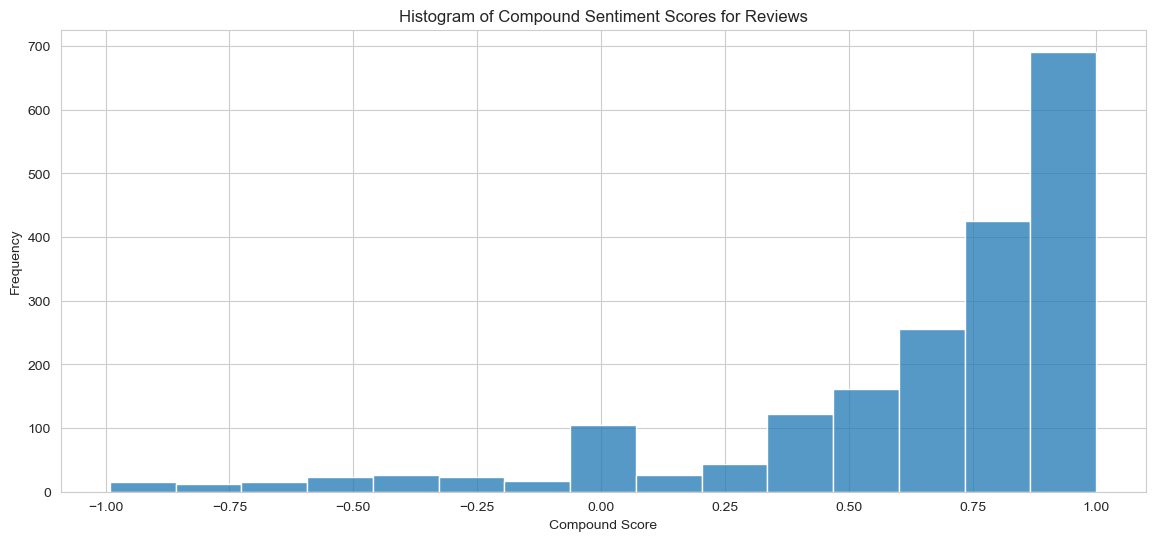

In [86]:
# Plot the histograms

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Generate a histogram of the 'compound' column from the dataframe
sns.histplot(df['compound'], bins=15, kde=False)

plt.title('Histogram of Compound Sentiment Scores for Reviews')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

In [87]:
# Review sentiment scores

df['compound'].describe()

count    1961.000000
mean        0.636398
std         0.400515
min        -0.991300
25%         0.518700
50%         0.788100
75%         0.907300
max         0.999600
Name: compound, dtype: float64

In [88]:
# Top 20 positive reviews

top_positive_reviews = df.nlargest(20, 'compound')[['review', 'summary', 'compound']]

# Print the top 20 positive reviews and summaries
for i, (index, row) in enumerate(top_positive_reviews.iterrows()):
    print(f"{i+1}. Review: {row['review']}\n   Summary: {row['summary']}\n   Compound Score: {row['compound']}\n")

1. Review: disclaimer bought this from a local store paid list value but supporting local game stores helps keep them in business and its a rough market to keep a gaming store running also i do not own nor have i playednbspa datahookproductlinklinked classalinknormal hrefdungeonsdragonscastleravenloftboardgamedp0786955570refcm_cr_arp_d_rvw_txtieutf8dungeons  dragons castle ravenloft board gamea the first dd adventures board game regardless

dungeons  dragons wrath of ashardalon board game woa is a fantastic value at 65 list you get 42 plastic unpainted minis 1 scale you get a nice set of cardboard interlocking dungeon tiles and you get a fun very random board game playable either by yourself or with up to 4 friends

what it is
woa is in gamer terms a roguelike in tabletop form in laymans terms woa is a dungeon crawler you start at the entrance and have a specific goal rescue the villagers survive the dungeon destroy the altar slay the dragon the adventures are built randomly based on s

In [89]:
# Top 20 negative reviews 

top_negative_reviews = df.nsmallest(20, 'compound')[['review', 'summary', 'compound']]

# Print the top 20 negative reviews and summaries
for i, (index, row) in enumerate(top_negative_reviews.iterrows()):
    print(f"{i+1}. Review: {row['review']}\n   Summary: {row['summary']}\n   Compound Score: {row['compound']}\n")

1. Review: here is my review crossposted from boardgamegeekcom

i have fond memories of dd from my youth that i occasionally attempt to recapture i remember the sense of vague foreboding conjured by rpglike board games such as runequest and spacehulk i had read some favorable reviews of the new rpgasboardgame series promoted by wizards on the coast and i was excited to try this i splunked down my hardearned cash and amazon duly delivered a hefty box of dreams to my doorstep

wrath of ashardalon and i had some good times initially my friends and i gamely punched all the cardboard pieces out of the sprues we love punching pieces out of sprues it inspires a sense of childlike wonder and anticipation in us this tile has a horrid chamber on it that dungeon tile has dead bodies ooh i wonder what a flaming sphere does these cards all have various powers and spells on them look you can play a dragon character and the plastic figurines were enjoyable similar to those plastic dinosaurs we all ha